# Information Extraction

All assignments were tested in the [Google Colab](https://colab.research.google.com/notebooks/). All core packages are already installed there. 

If you use your python environment, probably you'll need to install them separately via pip or conda

In [4]:
pip install numpy pandas matplotlib nltk wordcloud scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package 

True

## Part I. Regular Expressions

### 1.1 Basic Regex
Write a regular expression to search for emails in text.

Let's start from the basic emails like john@gmail.com

<details>
<summary>hints:</summary>

you need to catch patterns like word@word.word

one of the ways to catch any word character is **\w** 

if you need to repeat some character you can use **+**

so to catch the full word **\w+** will be enough

if you need to escape some character (because it's a reserved character), you can use **\\**, e.g. **\\.**

you can find all special characters in the [documentation](https://docs.python.org/3/library/re.html)

</details>

In [6]:
import re

def catch_simple_emails(text: str) -> list:

  pattern = r"\w+@\w+\.\w+"
  email_regex = re.compile(pattern, re.I)       
  emails = email_regex.findall(txt)
  return emails

In [7]:
txt = "Most beginners use generic free business email accounts without a domain name which isn’t very professional. For example: johnsmith2019@gmail.com or jsmithfromstargardening@yahoo.com"
try:
  assert catch_simple_emails(txt) == ['johnsmith2019@gmail.com', 'jsmithfromstargardening@yahoo.com']
  print('passed')
except AssertionError:
  print('failed')
  print(catch_simple_emails(txt))

passed


### 1.2 Complex Regex
How can it be modified to catch more complex emails like john.smith@yahoo.co.id or john-smith@yahoo.co.id?

Emails also can contain other symbols but they are not required in this assignment
<details>
<summary>hints:</summary>

you need to replace single words with word sequences separated by dots or hyphens

</details>

In [8]:
def catch_complex_emails(txt: str) -> list:
  pattern = r"[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]+"
  email_regex = re.compile(pattern, re.I)       
  emails = email_regex.findall(txt)
  return emails

In [10]:
txt = """
simple@example.com nuff said
very.common@example.com very.very.common
very.common@long.example.com multiple domain levels
other.email-with-hyphen@example.com dot + hyphen
fully-qualified-domain@example.com hyphen only
x@example.com single letter
example-indeed@strange-example.com one more example
"""
try:
  assert catch_complex_emails(txt) == ['simple@example.com',
  'very.common@example.com',
  'very.common@long.example.com',
  'other.email-with-hyphen@example.com',
  'fully-qualified-domain@example.com',
  'x@example.com',
  'example-indeed@strange-example.com']
  print('passed')
except AssertionError:
  print('failed')
  print(catch_complex_emails(txt))

passed


### 1.3 Regex-based Tokenizer

Using your knowledge of regular expressions, write a simple text tokenizer that can separate punctuation, numbers, and words into individual tokens.

Assumptions:

* Floating point numbers like 1.23 fit in one token. The decimal separator can be either a dot or a comma.
* The number can be negative and have a sign like -10.5.
* There may not be an integer part of the number at all: the sequences -0.15 and -.15 mean the same number.
* Empty fractional part is not allowed: string "10." must be split into two tokens: "10" and "."
* Consecutive punctuation marks are separated each into a separate token.
* Only English letters are allowed in words.
* Empty tokens must be removed

<details>
<summary>hints:</summary>

To combine individual checks into a single regex, you can use the operator | (or), e.g. '[a-z]|[0-9]' means one letter from a to z or one number from 0 to 9

Remember that if regex contains multiple blocks, they are processed in natural order (from left to right), so you should catch more complex elements first (e.g., catch floating point numbers before integers); otherwise, you can lose it.

</details>


In [11]:
def text_split(txt: str) -> list:
  pattern = r"[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]+"
  token_regex = re.compile(pattern, re.I)       
  tokens = token_regex.findall(txt)
  return tokens  

In [12]:
txt = {
  '': [],
  '$0.00 "Surplus";$-0.00 "Shortage"': ['$', '0.00', '"', 'Surplus', '"', ';', '$', '-0.00', '"', 'Shortage', '"'],
  'Combine text and numbers': ['Combine', 'text', 'and', 'numbers'],
  'Combine_text_and$$numbers': ['Combine', '_', 'text', '_', 'and', '$', '$', 'numbers'],
  '(.4 in this example)': ['(', '.4', 'in', 'this', 'example', ')'],
  '(4. in this example)': ['(', '4', '.', 'in', 'this', 'example', ')'],
  '$$1,1%#-2': ['$', '$', '1,1', '%', '#', '-2'],
  '...': ['.', '.', '.'],
  'How to Sauté?': ['How', 'to', 'Saut', 'é', '?']

}

In [13]:
for x in txt:
  try:
    assert text_split(x) == txt[x]
    print('passed')
  except AssertionError:
    print('failed')
    print(text_split(x))

passed
failed
[]
failed
[]
failed
[]
failed
[]
failed
[]
failed
[]
failed
[]
failed
[]


## Part II. Fuzzy matching

Fuzzy Matching (also called Approximate String Matching) is a technique that helps identify two elements of text, strings, or entries that are approximately similar but are not exactly the same.

### 2.1 Levenshtein distance

The Levenshtein distance is a metric used to measure the difference between 2 string sequences.

It gives us a measure of the number of single character insertions, deletions or substitutions required to change one string into another.

 You can find an algorythm and the full description [here](https://en.wikipedia.org/wiki/Levenshtein_distance)

For our task we'll use python-levenshtein library.

In [3]:
!pip install python-levenshtein # if not already installed

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# simple approach
import string
from Levenshtein import distance as levenshtein_distance

txt = 'Health chiefs today announced a fresh Covid vaccine programme ahead of what they fear will be a difficult winter.'
clean_txt = ''.join([c for c in txt.lower() if c not in string.punctuation])
words = [i for i in clean_txt.split()]
pattern = 'Covid'

for word in words:
  print(f"distance between {word} and {pattern} is {levenshtein_distance(word, pattern)}")

distance between health and Covid is 6
distance between chiefs and Covid is 6
distance between today and Covid is 4
distance between announced and Covid is 7
distance between a and Covid is 5
distance between fresh and Covid is 5
distance between covid and Covid is 1
distance between vaccine and Covid is 6
distance between programme and Covid is 8
distance between ahead and Covid is 4
distance between of and Covid is 4
distance between what and Covid is 5
distance between they and Covid is 5
distance between fear and Covid is 5
distance between will and Covid is 5
distance between be and Covid is 5
distance between a and Covid is 5
distance between difficult and Covid is 8
distance between winter and Covid is 6


Your task.
Implement a function that will return the word from the text that is most similar to the given pattern.

If there are many words with the same distance, please use the first one


In [15]:
def find_similar_word(txt: str, pattern: str) -> str:

  out = ''
  # PUT YOUR CODE HERE
  import string
  from Levenshtein import distance as levenshtein_distance
  clean_txt = ''.join([c for c in txt.lower() if c not in string.punctuation])
  words = clean_txt.split()
  min_dist = float('inf')
  for word in words:
      dist = levenshtein_distance(word, pattern)
      if dist < min_dist:
          min_dist = dist
          out = word
  return out

In [16]:
txt = 'spaCy is a free open-source library for Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more.'
try:
  assert find_similar_word(txt, 'dependent') == 'dependency'
  print('passed')
except AssertionError:
  print('failed')
  print(find_similar_word(txt, 'dependent'))

passed


Implement a function that will return the pair of most similar words in the given text.



In [17]:
def find_similar_words(txt: str) -> list: # output should be like ['word1', 'word2']
    out = []
    clean_txt = ''.join([c for c in txt.lower() if c not in string.punctuation])
    words = clean_txt.split()
    min_dist = float('inf')
    pair = ('', '')
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            dist = levenshtein_distance(words[i], words[j])
            if dist < min_dist:
                min_dist = dist
                pair = (words[i], words[j])
    out = list(pair)
    return out

In [18]:
txt = 'Sentence splitting is the process of dividing text into sentences'
try:
  assert find_similar_words(txt) == ['sentence', 'sentences']
  print('passed')
except AssertionError:
  print('failed')
  print(find_similar_words(txt))

passed


You can find an additional fuzzy matching component for SpaCy here:
https://github.com/gandersen101/spaczz

There are many different libraries for this, such as tfidf-matcher, fuzzywuzzy, rapidfuzz, etc.

For simplicity, we will not touch them.

## Part III. Named Entity Recognition

Named-entity recognition (NER) (also known as (named) entity identification, entity chunking, and entity extraction) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

For this task it is better to use either **NLTK** or **SpaCy** libraries.

### 3.1 NLTK Approach 

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\renas.alp\AppData\Roaming\nltk_data.

True

In [20]:
def nltk_ner(txt: str) -> list:

  out = []

  for sent in nltk.sent_tokenize(txt):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
      if hasattr(chunk, 'label'):
          out.append(f"{chunk.label()} {' '.join(c[0] for c in chunk)}")
  return out

In [21]:
txt = "Boris Johnson skipped out on his second emergency meeting in a row today and tomorrow he is hosting a lavish goodbye bash at Chequers. A spokesman said Sunday's party was a 'private event'."
nltk_ner(txt)

['PERSON Boris', 'PERSON Johnson', 'ORGANIZATION Chequers']

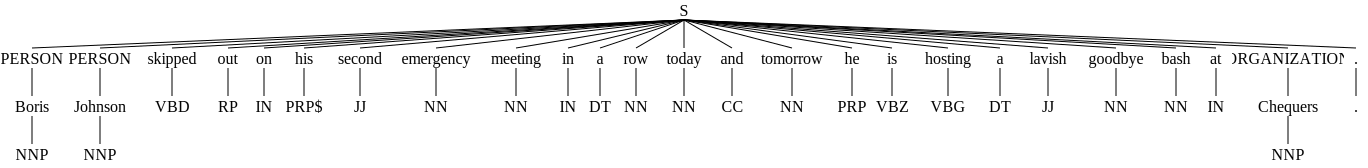

In [22]:
nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(nltk.sent_tokenize(txt)[0])))


### 3.2 SpaCy Approach
Your task.

Repeat the same procedure using the Spacy library. Compare the results of both functions. What can you say about it?

list of all useful properties:  [Doc](https://spacy.io/api/doc#ents)


In [23]:
r = r"C:\Python3XX\Scripts"

In [27]:
def spacy_ner(txt: str) -> list: # output should be like ['label1 word1', 'label2 word2', ...]
    out = []
    import spacy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(txt)
    for ent in doc.ents:
        out.append(f"{ent.label_} {ent.text}")
    return out

In [26]:
txt = "Boris Johnson skipped out on his second emergency meeting in a row today and tomorrow he is hosting a lavish goodbye bash at Chequers. A spokesman said Sunday's party was a 'private event'."
try:
  assert spacy_ner(txt) == ['PERSON Boris Johnson', 'ORDINAL second', 'DATE today', 'DATE tomorrow', 'DATE Sunday']
  print('passed')
except AssertionError:
  print('failed')
  print(spacy_ner(txt))

ConfigError: unable to infer type for attribute "REGEX"

SpaCy can also render named entities so you can check yourself.

In [3]:
from spacy import displacy  
displacy.render(nlp(txt), jupyter=True, style='ent')

C:\Users\renas.alp\AppData\Roaming\Python\Python314\site-packages\confection\__init__.py:38: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1 import BaseModel, Extra, ValidationError, create_model


ConfigError: unable to infer type for attribute "REGEX"